In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

In [2]:
# Load CSV file with image labels
data_path = "C:\\Users\\USER\\Documents\\4-2  Thesis\\Dataset\\train_validate_set.csv"
image_dir = "C:\\Users\\USER\\Documents\\4-2  Thesis\\train_validation(1)"

In [3]:
# Load and preprocess the dataset
data = pd.read_csv(data_path)
data['file_path'] = data['image_id'].apply(lambda x: os.path.join(image_dir, x+".jpg"))
data['label'] = data['label'].astype(str)

In [4]:
# Parameters
img_height, img_width = 224, 224  # Image dimensions
batch_size = 32
epochs = 40

In [5]:
# Prepare Image Data Generator
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

train_gen = data_gen.flow_from_dataframe(
    dataframe=data,
    directory=image_dir,
    x_col='file_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = data_gen.flow_from_dataframe(
    dataframe=data,
    directory=image_dir,
    x_col='file_path',
    y_col='label',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6523 validated image filenames belonging to 4 classes.
Found 1630 validated image filenames belonging to 4 classes.


In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # Adjust output layer for 4 classes
])

In [7]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    steps_per_epoch=train_gen.samples // batch_size,
    validation_steps=val_gen.samples // batch_size,
    # callbacks=[lr_scheduler]
)

Epoch 1/40
203/203 [==============================] - 18s 72ms/step - loss: 0.7630 - accuracy: 0.7326 - val_loss: 0.6718 - val_accuracy: 0.7344
Epoch 2/40
203/203 [==============================] - 11s 53ms/step - loss: 0.6718 - accuracy: 0.7424 - val_loss: 0.6518 - val_accuracy: 0.7344
Epoch 3/40
203/203 [==============================] - 10s 51ms/step - loss: 0.6478 - accuracy: 0.7487 - val_loss: 0.6202 - val_accuracy: 0.7531
Epoch 4/40
203/203 [==============================] - 11s 51ms/step - loss: 0.6186 - accuracy: 0.7484 - val_loss: 0.6034 - val_accuracy: 0.7681
Epoch 5/40
203/203 [==============================] - 11s 51ms/step - loss: 0.6069 - accuracy: 0.7583 - val_loss: 0.6137 - val_accuracy: 0.7475
Epoch 6/40
203/203 [==============================] - 11s 51ms/step - loss: 0.5921 - accuracy: 0.7600 - val_loss: 0.5848 - val_accuracy: 0.7606
Epoch 7/40
203/203 [==============================] - 11s 52ms/step - loss: 0.5786 - accuracy: 0.7621 - val_loss: 0.5990 - val_accuracy:

In [9]:
# Save the model
# model.save('skin_cancer_cnn_model2_40epo.h5')

In [10]:
# Evaluate the model
eval_result = model.evaluate(val_gen)
print(f"Validation Loss: {eval_result[0]}, Validation Accuracy: {eval_result[1]}")

51/51 [==============================] - 2s 43ms/step - loss: 2.0589 - accuracy: 0.7840
Validation Loss: 2.0589053630828857, Validation Accuracy: 0.7840490937232971


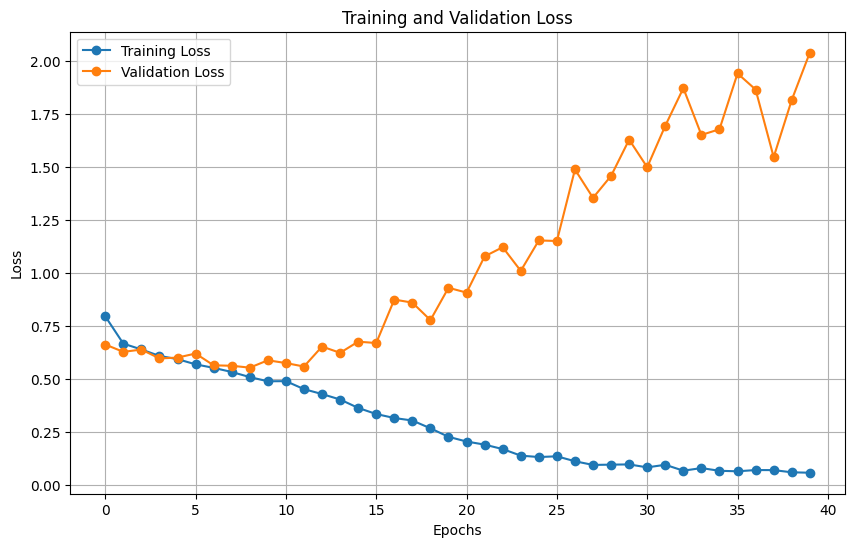

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

plot_loss(history)

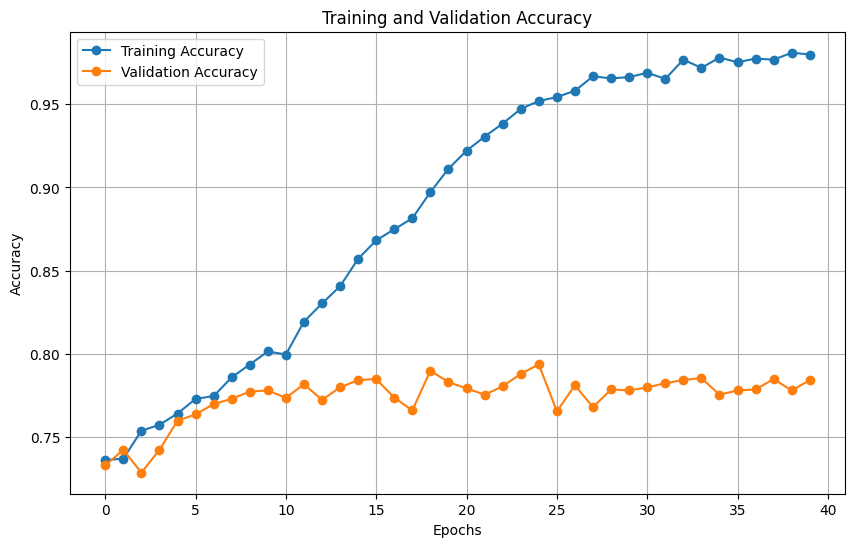

In [12]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

plot_accuracy(history)